In [1]:
!pip install kaggle

In [2]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle

In [4]:
!mv kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                      title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                       Vehicle Sales Data                               19MB  2024-02-21 20:16:17           5445         90  1.0              
tarunrm09/climate-change-indicators                      Climate change Indicators                        34KB  2024-02-22 08:53:54           2546         61  1.0              
nelgiriyewithana/apple-quality                           Apple Quality                                   170KB  2024-01-11 14:31:07          24658        527  1.0              
devi5723/e-commerce-cosmetics-dataset                    E-commerce Cosmetic Products                      1MB  202

In [7]:
!kaggle datasets download -d muhammetvarl/laptop-price

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.38MB/s]


In [8]:
!unzip laptop-price.zip

Archive:  laptop-price.zip
  inflating: laptop_price.csv        


In [115]:
import os

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
with open('laptop_price.csv', 'rb') as file:
  result = chardet.detect(file.read())
encoding = result['encoding']

df = pd.read_csv('laptop_price.csv', encoding=encoding)

In [64]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [66]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

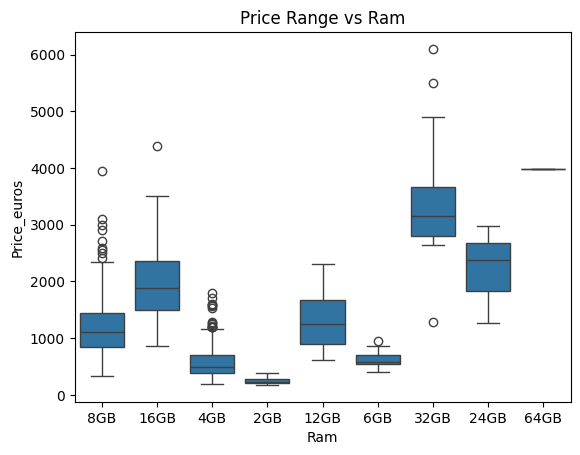

In [67]:
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Price Range vs Ram')
plt.show()

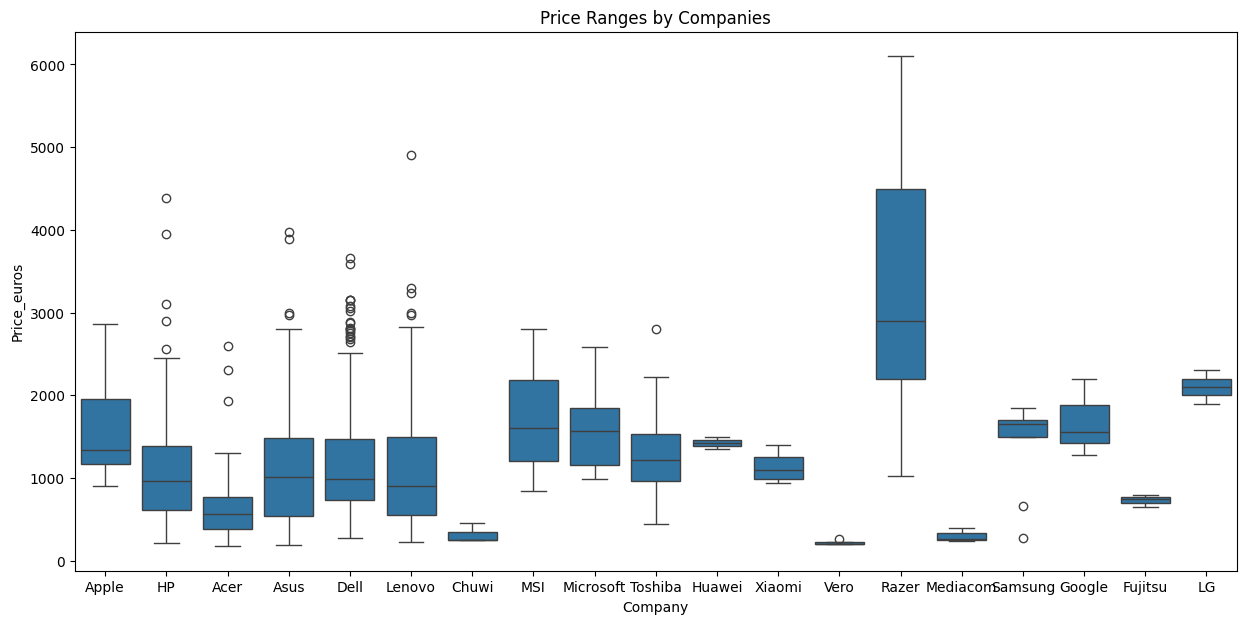

In [68]:
plt.figure(figsize=(15, 7))
plt.title('Price Ranges by Companies')
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.show()

<Axes: xlabel='TypeName'>

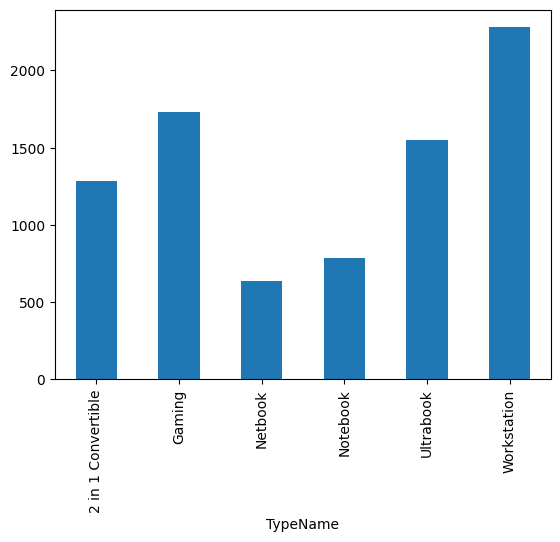

In [70]:
df.groupby('TypeName')['Price_euros'].mean().plot(kind='bar')

<Axes: xlabel='Company'>

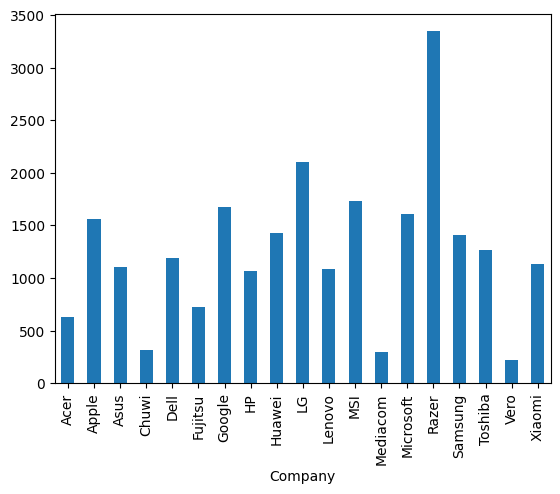

In [71]:
df.groupby('Company')['Price_euros'].mean().plot(kind='bar')

In [72]:
columns_to_drop = ['laptop_ID', 'Weight', 'Product']
df = df.drop(columns_to_drop, axis=1)

In [73]:
encoder = LabelEncoder()

In [74]:
company_encoder = encoder.fit(df['Company'])
df['Company'] = company_encoder.transform(df['Company'])

In [75]:
typename_encoder = encoder.fit(df['TypeName'])
df['TypeName'] = encoder.transform(df['TypeName'])

In [76]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [79]:
resolution_encoder = encoder.fit(df['ScreenResolution'])
df['ScreenResolution'] = encoder.transform(df['ScreenResolution'])

In [81]:
cpu_encoder = encoder.fit(df['Cpu'])
df['Cpu'] = encoder.transform(df['Cpu'])

In [83]:
ram_encoder = encoder.fit(df['Ram'])
df['Ram'] = ram_encoder.transform(df['Ram'])

In [84]:
memory_encoder = encoder.fit(df['Memory'])
df['Memory'] = memory_encoder.transform(df['Memory'])

In [86]:
gpu_encoder = encoder.fit(df['Gpu'])
df['Gpu'] = gpu_encoder.transform(df['Gpu'])

In [87]:
op_encoder = encoder.fit(df['OpSys'])
df['OpSys'] = op_encoder.transform(df['OpSys'])

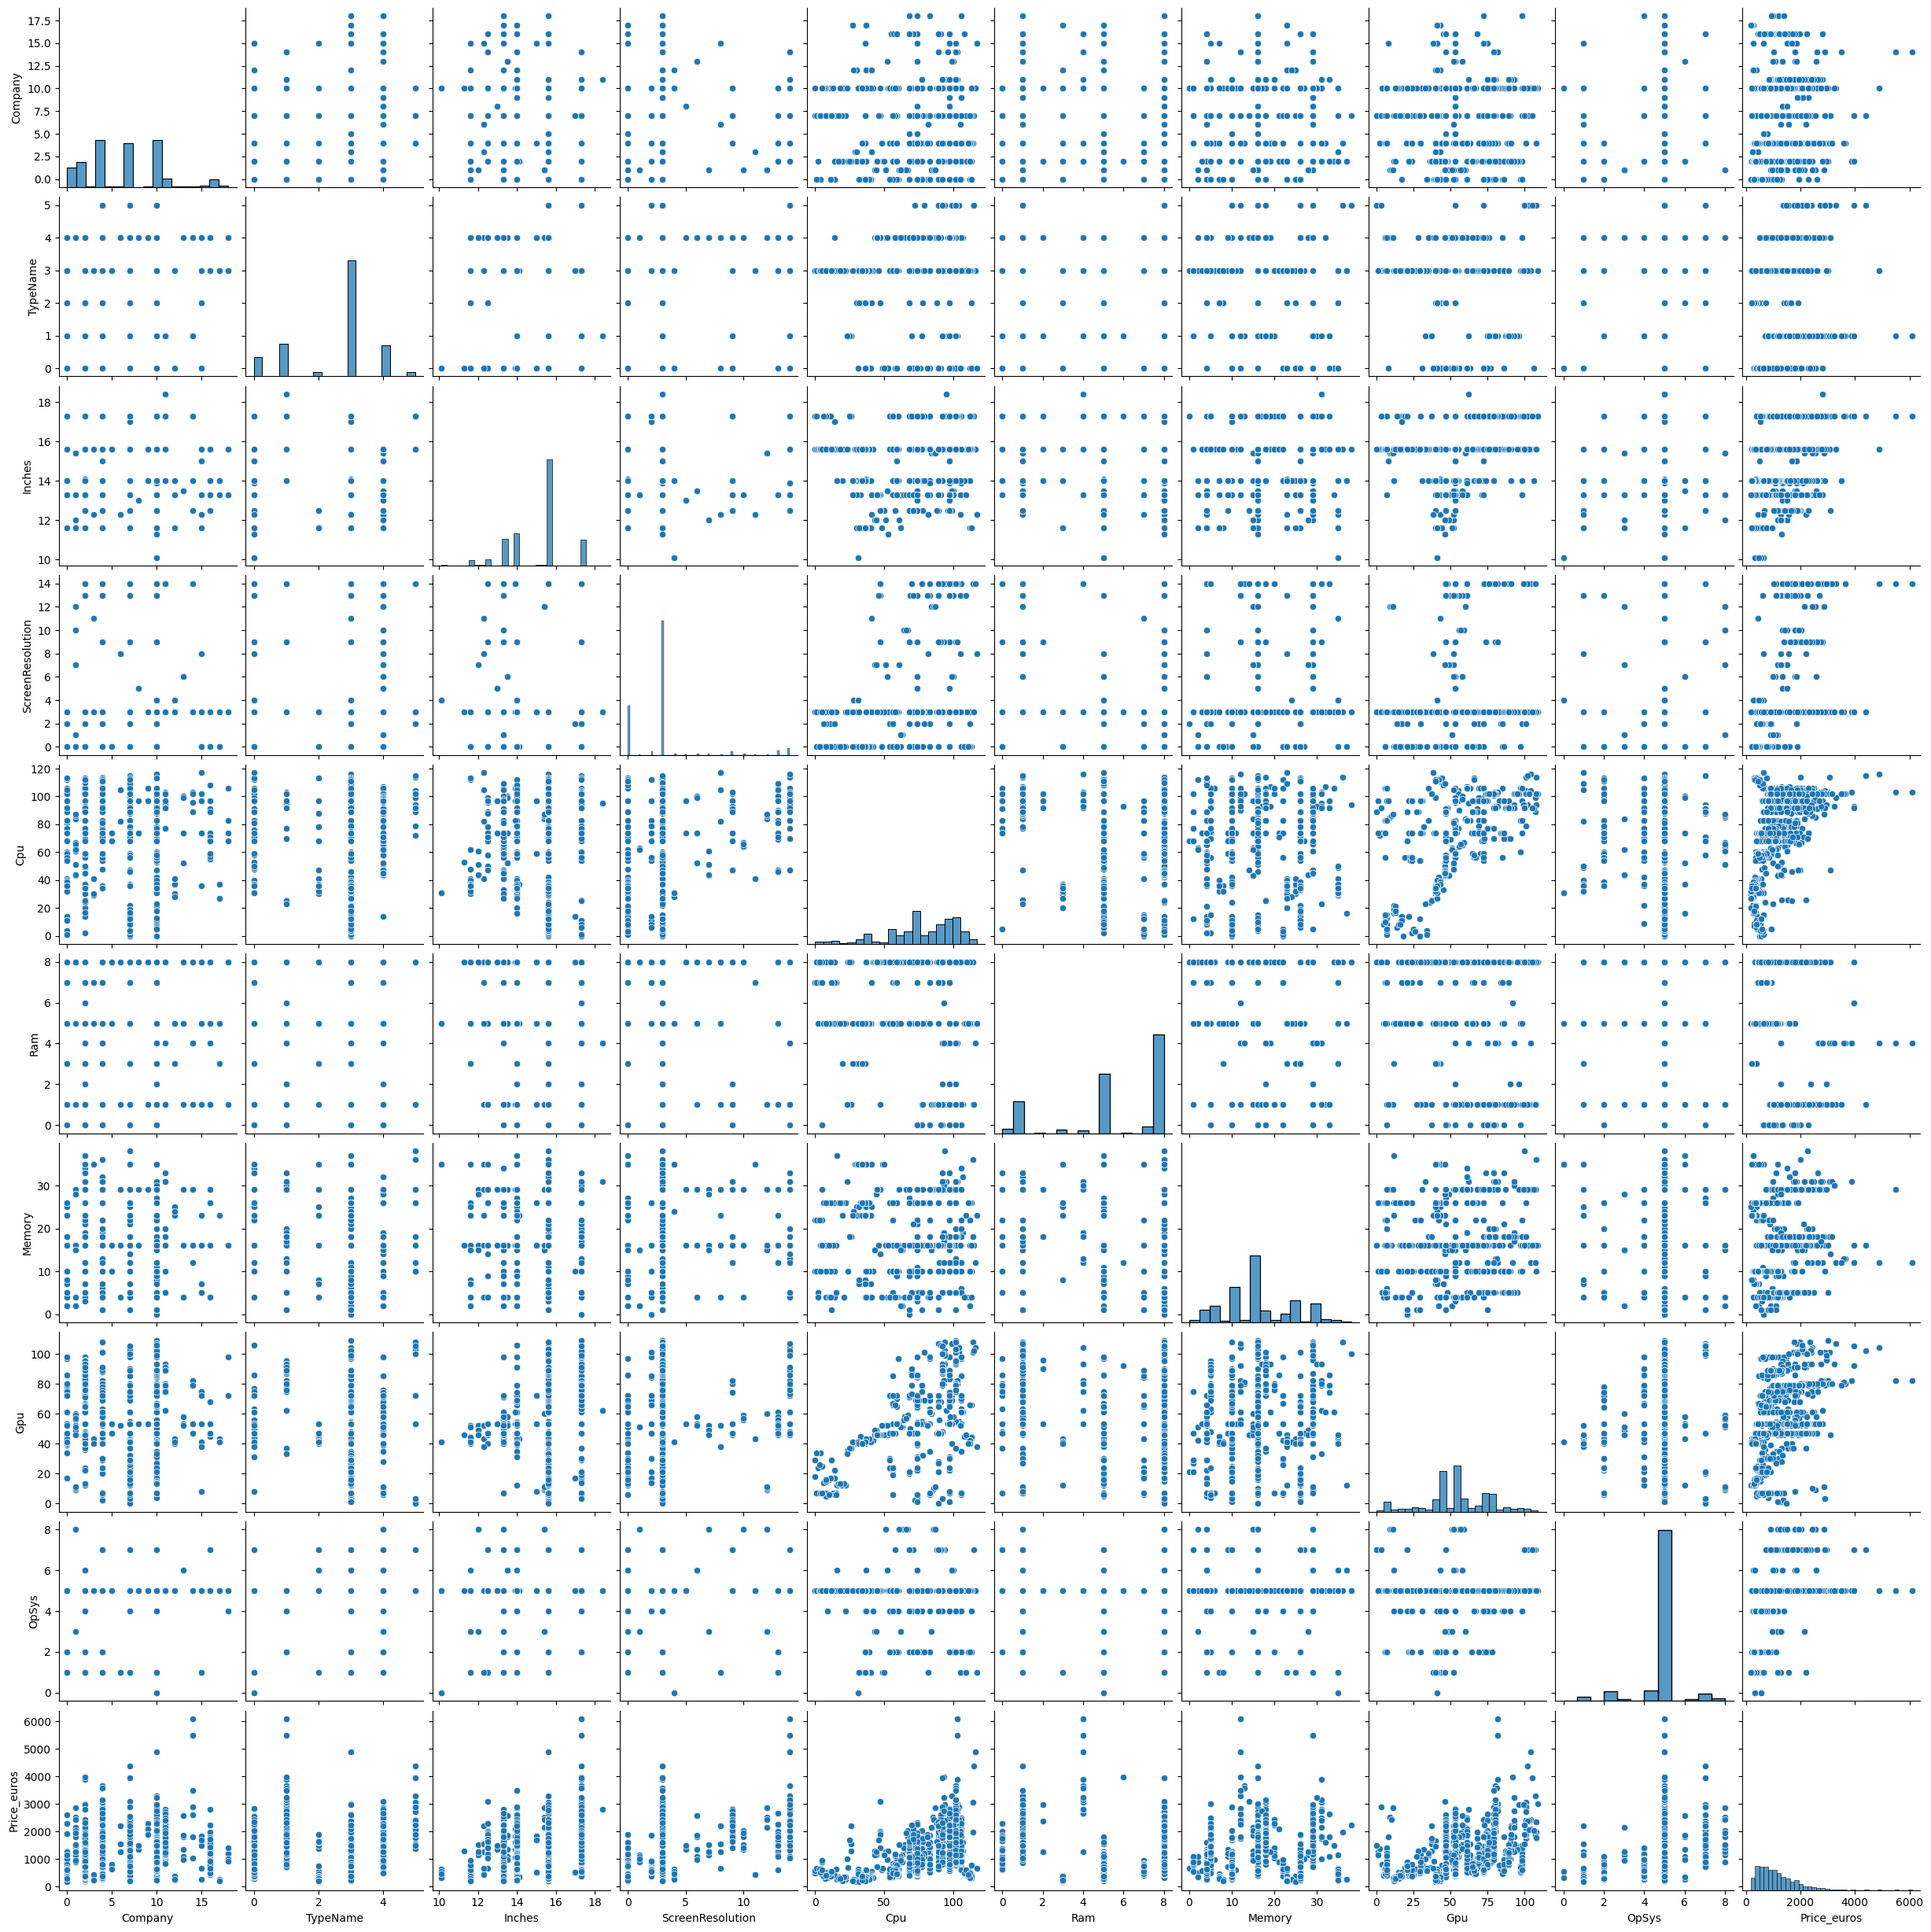

In [89]:
sns.pairplot(df)

<Axes: >

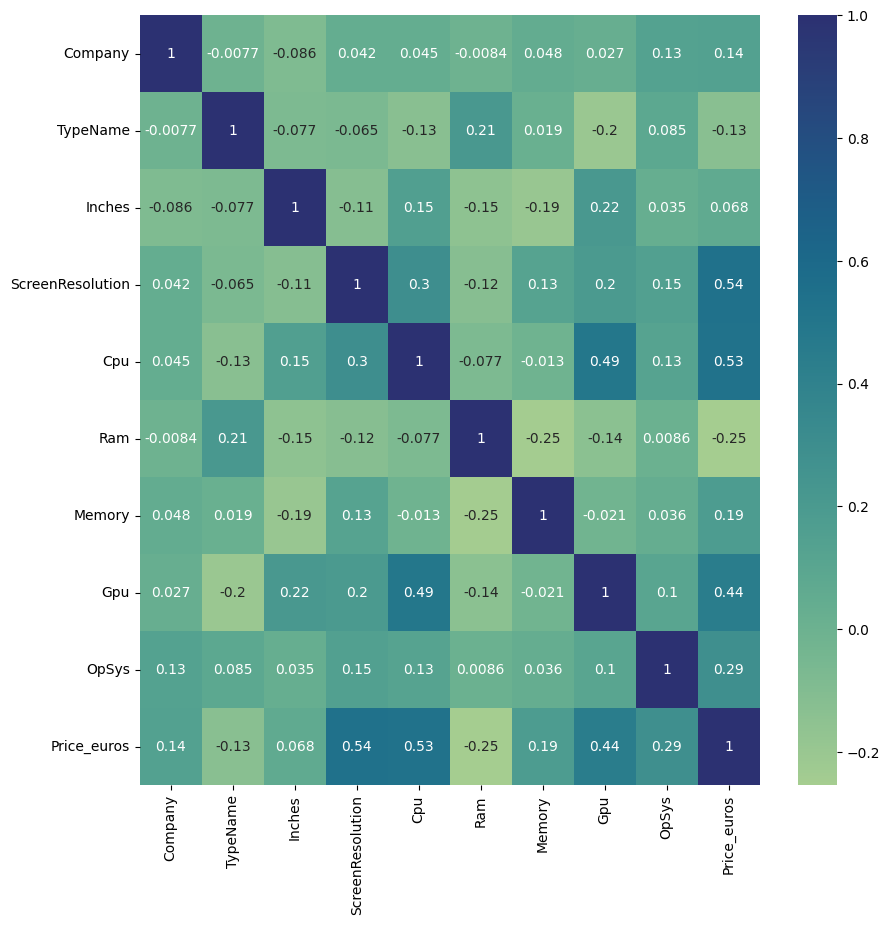

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='crest')

In [95]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,1,4,13.3,10,65,8,4,58,8,1339.69
1,1,4,13.3,1,63,8,2,51,8,898.94
2,7,3,15.6,3,74,8,16,53,4,575.00
3,1,4,15.4,12,85,1,29,9,8,2537.45
4,1,4,13.3,10,67,8,16,59,8,1803.60


In [96]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
model1 = LinearRegression()

In [108]:
model1.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred = model1.predict(x_test)

In [113]:
model1_mae = mean_absolute_error(y_pred, y_test)
model1_mae

366.2515099503005

In [114]:
model1_mse = mean_squared_error(y_pred, y_test)
model1_mse

268014.1199839255

In [117]:
model1_r2 = r2_score(y_pred, y_test)
model1_r2

-0.1630437481075977

In [118]:
model2 = ElasticNet()

In [119]:
model2.fit(x_train, y_train)

ElasticNet()

In [120]:
y_pred = model2.predict(x_test)

In [121]:
model2_mae = mean_absolute_error(y_pred, y_test)
model2_mae

362.4090099612245

In [122]:
model2_mse = mean_squared_error(y_pred, y_test)
model2_mse

268751.340903143

In [124]:
model2_r2 = r2_score(y_pred, y_test)
model2_r2

-0.22483794169065208

In [125]:
model3 = ExtraTreesRegressor()

In [126]:
model3.fit(x_train, y_train)

ExtraTreesRegressor()

In [127]:
y_pred = model3.predict(x_test)

In [128]:
model3_mae = mean_absolute_error(y_pred, y_test)
model3_mae

205.61181483375955

In [129]:
model3_mse = mean_squared_error(y_pred, y_test)
model3_mse

108979.4184565097

In [130]:
model3_r2 = r2_score(y_pred, y_test)
model3_r2

0.751216071768583

In [131]:
report = {
    "LinearRegression (model1)" : [model1_mae, model1_mse, model1_r2],
    "ElasticNet (model2)" : [model2_mae, model2_mse, model2_r2],
    "ExtraTreeRegressor (model3)" : [model3_mae, model3_mse, model3_r2]
}

In [132]:
report_df = pd.DataFrame(report, columns=report.keys())

In [136]:
report_df

,LinearRegression (model1),ElasticNet (model2),ExtraTreeRegressor (model3)
0,366.251510,362.409010,205.611815
1,268014.119984,268751.340903,108979.418457
2,-0.163044,-0.224838,0.751216


In [138]:
import pickle
with open('LaptopPricePredictor.pkl', 'wb') as file:
  pickle.dump(model3, file)